# 프로젝트명 : 1주차 제조데이터 실습코드

### 📌 프로젝트 소개

- 제품 및 공장의 불량률을 나타내는 제조 데이터는 민감한 정보이므로 기업이 공개적으로 공유하지 않는 경우가 많습니다.
- 그럼에도 불구하고 제조 공정의 불량률을 줄이거나 개선하는 데 도움이 될 수 있으므로 중요한 데이터입니다.
- 실제로 현장에서의 목표는 일반적인 데이터 분석처럼 단순히 고성능 예측 모델을 개발하는 것이 아닙니다. 대신 `어떤 요인이 결함에 영향을 미치는지 이해하고 이를 줄이기 위한 효과적인 전략을 결정`하는 데 중점을 둡니다.
- 따라서 데이터 분석가의 임무는 `다양한 데이터를 분석하고 제품 불량 발생률을 줄일 수 있는 솔루션을 제공`하는 것입니다.


### ✅ 데이터 안내
- 본 실습에 사용된 데이터는 실제 제조과정에서 나온 데이터로 익명처리되어 어느 회사의 제품인지 식별이 불가능합니다.
- 제조업 데이터를 다루다 보면 제조업 분야에서 흔히 발생하는 `데이터 불균형`을 자주 접하게 됩니다.
- 비식별화된 제조 데이터에서 `종속변수 Y`는 `제품의 불량 여부`를 나타냅니다.
- X로 표시된 나머지 변수는 독립변수입니다.
|


![워크플로우](https://firebasestorage.googleapis.com/v0/b/ls-storage-e452a.appspot.com/o/%E1%84%91%E1%85%B3%E1%84%85%E1%85%A6%E1%84%8B%E1%85%B5%E1%86%B7%E1%84%8B%E1%85%AF%E1%84%8F%E1%85%B3.png?alt=media&token=f36c92c6-ef43-4733-92f7-03a3f76233f0)

### 1. 문제 정의

- 1. 제품 생산 과정에서 불량품에 영향을 주는 변수를 찾아주세요.
- 2. 불량품을 개선할 수 있는 솔루션을 제시해주세요.

In [98]:
import pandas as pd
import matplotlib.pyplot as plt
import sweetviz as sv ## EDA 툴
import missingno as msno ## 결측치 확인
import numpy as np
import scipy ## 통계분석
from sklearn.model_selection import train_test_split # 데이터 분할
import graphviz
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.metrics import precision_recall_curve
%matplotlib inline


In [99]:
data = pd.read_csv('./data/1주_실습데이터.csv')

In [100]:
data['Y'].value_counts(), data['Y'].value_counts(normalize=True)

(0    470000
 1     57000
 Name: Y, dtype: int64,
 0    0.891841
 1    0.108159
 Name: Y, dtype: float64)

### 2. 변수확인

#### 2-1) 데이터 명세서

In [101]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 527000 entries, 0 to 526999
Data columns (total 21 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   X1      527000 non-null  float64
 1   X2      527000 non-null  float64
 2   X3      527000 non-null  float64
 3   X4      527000 non-null  float64
 4   X5      527000 non-null  float64
 5   X6      527000 non-null  float64
 6   X7      527000 non-null  float64
 7   X8      527000 non-null  float64
 8   X9      527000 non-null  float64
 9   X10     527000 non-null  float64
 10  X11     527000 non-null  float64
 11  X12     527000 non-null  float64
 12  X13     527000 non-null  float64
 13  X14     527000 non-null  float64
 14  X15     527000 non-null  float64
 15  X16     527000 non-null  float64
 16  X17     527000 non-null  float64
 17  X18     527000 non-null  float64
 18  X19     527000 non-null  float64
 19  X20     527000 non-null  float64
 20  Y       527000 non-null  int64  
dtypes: float64

In [162]:
def column_summary(df):
    summary_data = []
    print("✅ 데이터의 칼럼 수는 총 {}개 입니다.".format(len(df.columns)))
    print("✅ 데이터의 총 row 수는 총 {}개 입니다.".format(len(df)))
    
    for col_name in df.columns:
        col_dtype = df[col_name].dtype
        num_of_nulls = df[col_name].isnull().sum()
        num_of_non_nulls = df[col_name].notnull().sum()
        num_of_distinct_values = df[col_name].nunique()
        
        if num_of_distinct_values <= 10:
            distinct_values_counts = df[col_name].value_counts().to_dict()
        else:
            top_10_values_counts = df[col_name].value_counts().head(10).to_dict()
            distinct_values_counts = {k: v for k, v in sorted(top_10_values_counts.items(), key=lambda item: item[1], reverse=True)}

        summary_data.append({
            'col_name': col_name,
            'col_dtype': col_dtype,
            'num_of_nulls': num_of_nulls,
            'num_of_non_nulls': num_of_non_nulls,
            'num_of_distinct_values': num_of_distinct_values,
            'distinct_values_counts': distinct_values_counts
        })
    
    summary_df = pd.DataFrame(summary_data)
    return summary_df

summary_df = column_summary(data)
display(summary_df)

✅ 데이터의 칼럼 수는 총 19개 입니다.
✅ 데이터의 총 row 수는 총 527000개 입니다.


,col_name,col_dtype,num_of_nulls,num_of_non_nulls,num_of_distinct_values,distinct_values_counts
0,X1,float64,0,527000,128005,"{0.3997444: 17161, 0.034405738: 4952, 0.049564..."
1,X2,float64,0,527000,23468,"{0.001067895: 1612, 0.003337197: 275, 0.002500..."
2,X3,float64,0,527000,5117,"{0.0: 17360, 0.4151616: 1763, 0.4159068: 1750,..."
3,X5,float64,0,527000,229,"{0.6931472: 289447, 0.6888105: 72574, 0.510594..."
4,X6,float64,0,527000,27677,"{0.012275252: 1576, 0.022167737: 222, 0.039883..."
5,X7,float64,0,527000,3553,"{0.34682995: 9522, 0.3462182: 6297, 0.34652412..."
6,X8,float64,0,527000,25320,"{0.017663166: 17125, 0.018101616: 4972, 0.0247..."
7,X9,float64,0,527000,40,"{0.6359888: 44050, 0.6241543: 43606, 0.6706743..."
8,X10,float64,0,527000,2769,"{0.2959293: 14782, 0.296729: 12529, 0.2973683:..."
9,X11,float64,0,527000,19305,"{0.000958465: 1576, 0.001799225: 357, 0.001783..."


In [102]:
## Data EDA tool
## sweetviz를 이용해 데이터를 분석해보자
train_report = sv.analyze(data, 
                          pairwise_analysis='on' # 변수간의 관계 분석
                          )
train_report.show_html('report.html')

                                             |          | [  0%]   00:00 -> (? left)

Report report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [103]:
## 값이 1개인 변수 제거
## df 중 데이터 종류가 1개인 데이터 확인
one_value_col = []
for i in data.columns:
    if len(data[i].value_counts()) == 1:
        one_value_col.append(i)

print(one_value_col)

## 데이터에서 제거
data = data.drop(one_value_col, axis=1)
data.head()

['X4', 'X13']


,X1,X2,X3,X5,X6,X7,X8,X9,X10,X11,X12,X14,X15,X16,X17,X18,X19,X20,Y
0,0.202296,0.003560,0.411261,0.693147,0.036360,0.343512,0.028087,0.681974,0.295769,0.003053,0.682731,0.681974,0.016330,0.242926,0.557461,0.028087,0.682731,0.036360,0
1,0.006836,0.007688,0.597304,0.686838,0.067407,0.347869,0.028640,0.497403,0.297943,0.005816,0.680891,0.497403,0.670040,0.245876,0.561336,0.028640,0.680891,0.067407,0
2,0.609621,0.001461,0.466186,0.693090,0.018944,0.345032,0.024502,0.647685,0.298255,0.001475,0.685525,0.647685,0.648486,0.243602,0.559431,0.024502,0.685525,0.018944,0
3,0.074007,0.003072,0.535876,0.693147,0.031475,0.347502,0.025393,0.587787,0.296057,0.002462,0.677980,0.575364,0.632563,0.246078,0.556761,0.025393,0.677980,0.031475,0
4,0.198356,0.007020,0.416238,0.686838,0.061888,0.347441,0.028450,0.537143,0.298167,0.005314,0.673286,0.537143,0.671124,0.245505,0.561695,0.028450,0.673286,0.061888,0


#### 2-2) 목표 정의
- 1. 어느 변수가 불량품을 야기하는지 파악하자.
- 2. 불량품이 나오기 직전의 임계점을 파악하자.

### 3. EDA

#### 3-1) 이상치, 결측값 확인

- 결측값 없음


In [104]:
## 결측값 확인
data.isnull().sum()

X1     0
X2     0
X3     0
X5     0
X6     0
X7     0
X8     0
X9     0
X10    0
X11    0
X12    0
X14    0
X15    0
X16    0
X17    0
X18    0
X19    0
X20    0
Y      0
dtype: int64

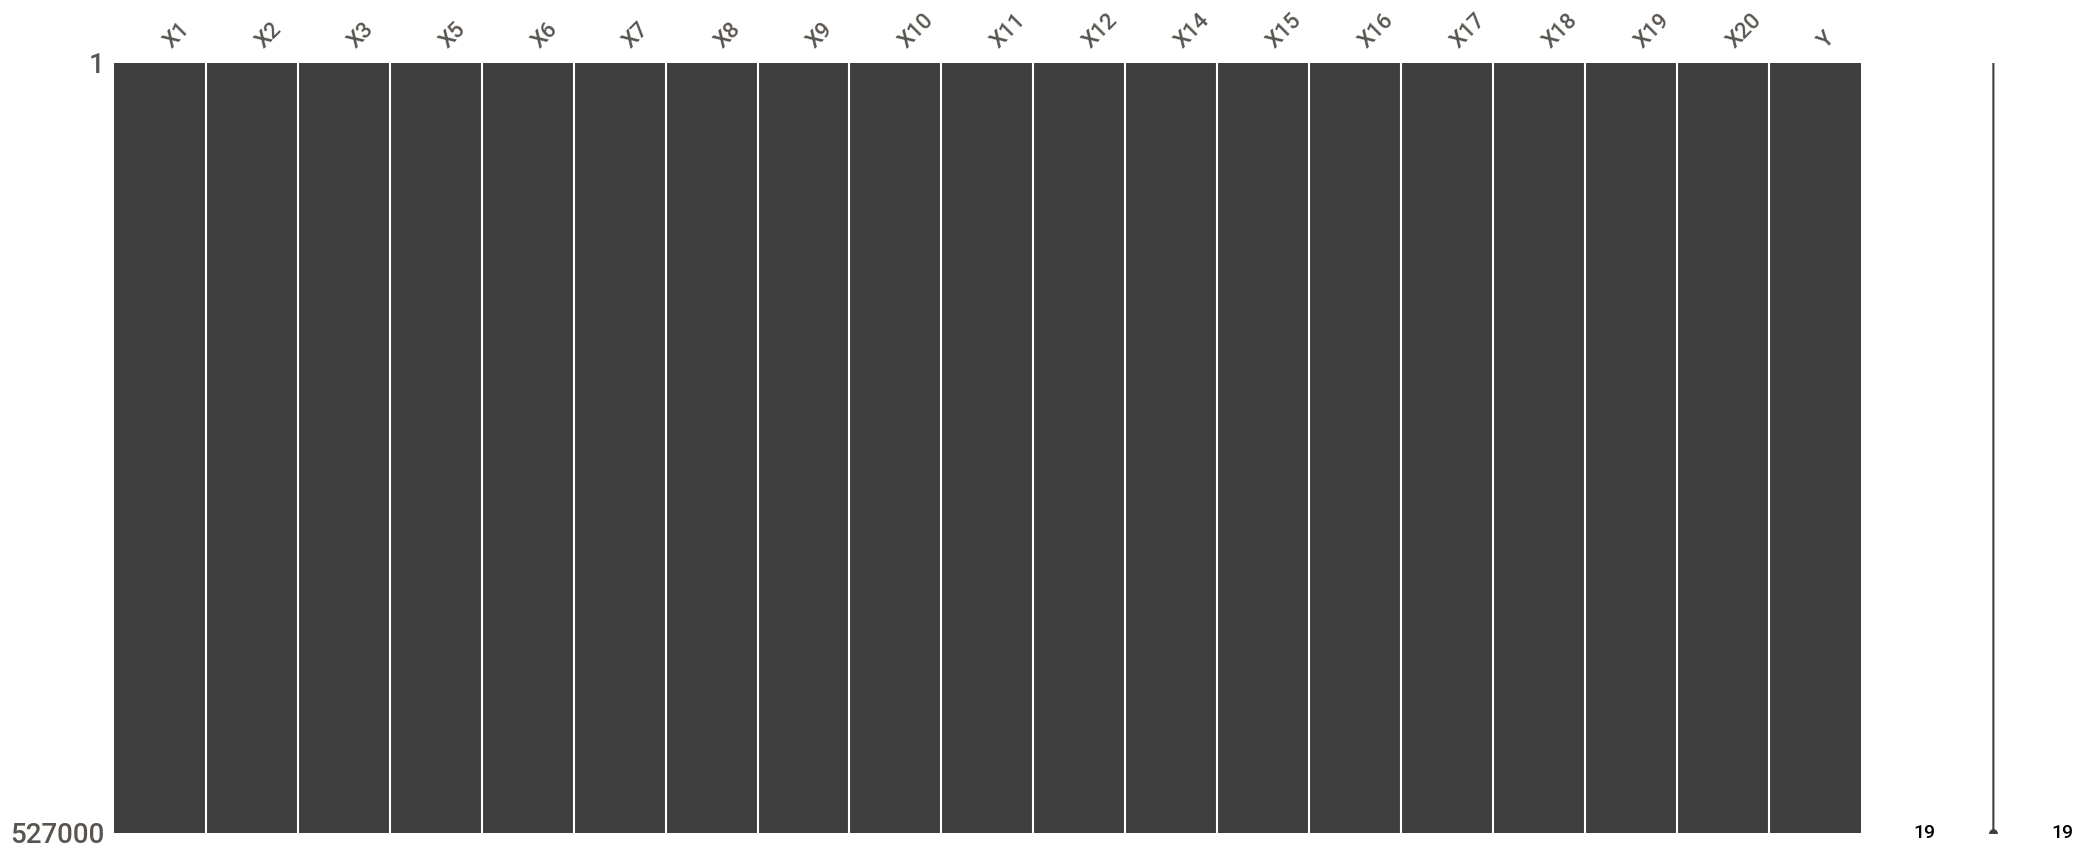

In [105]:
msno.matrix(data)
plt.show()


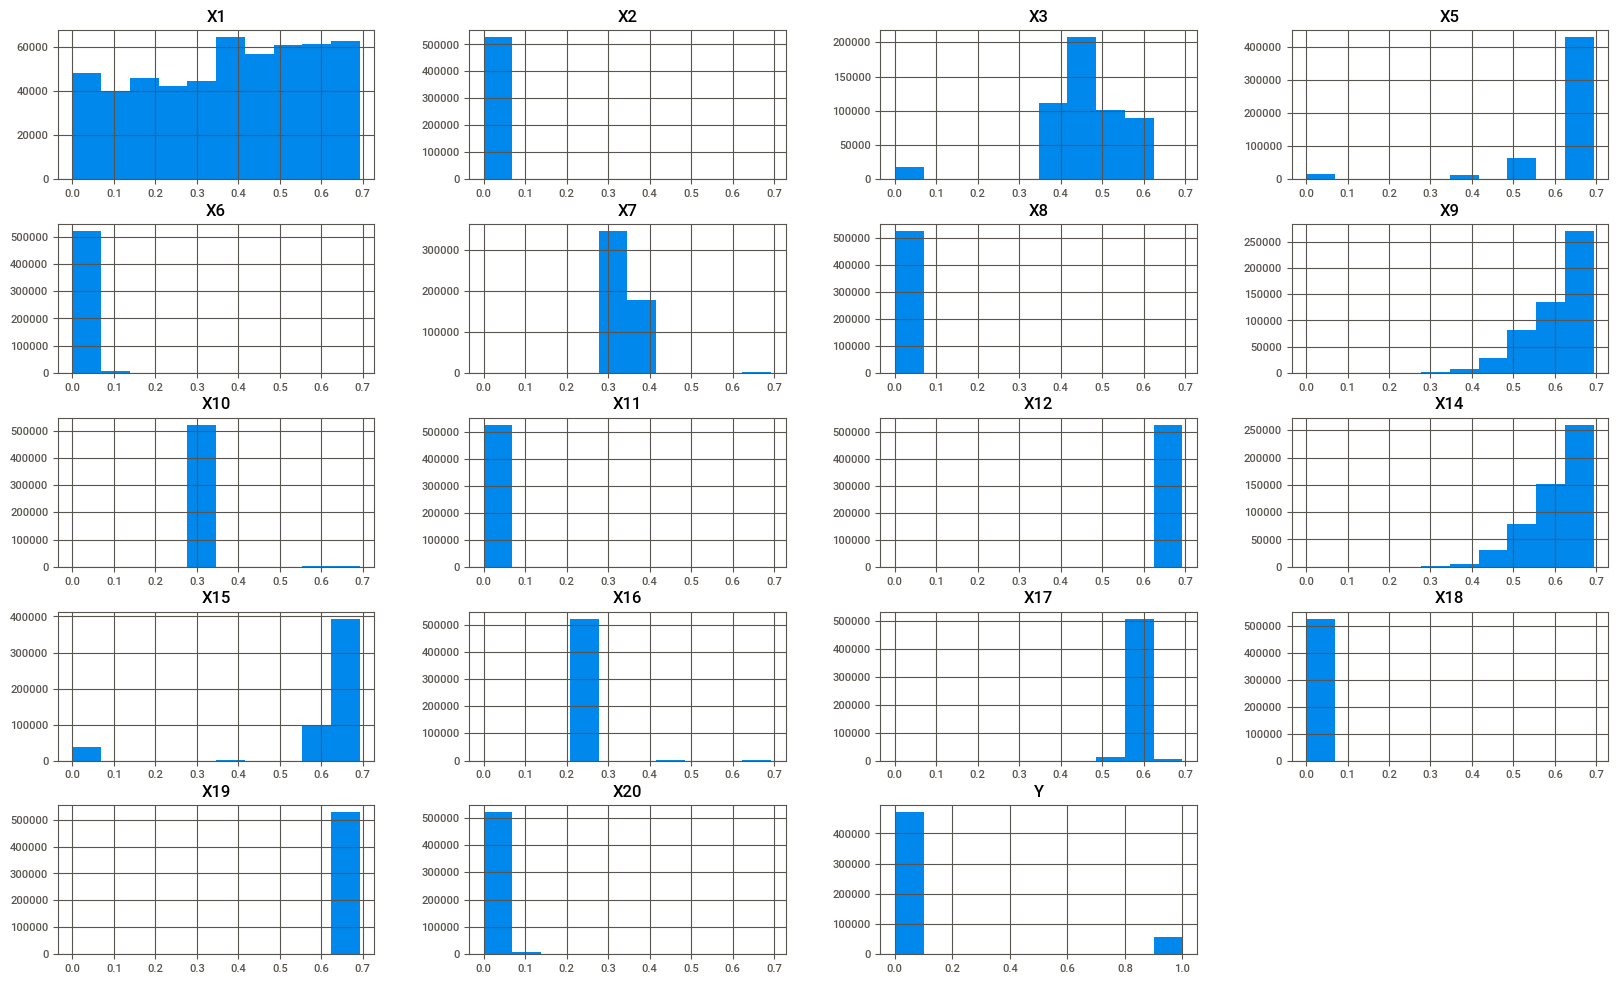

In [106]:
## data 전체 변수별 분포 확인
data.hist(figsize=(20, 12))
plt.show()

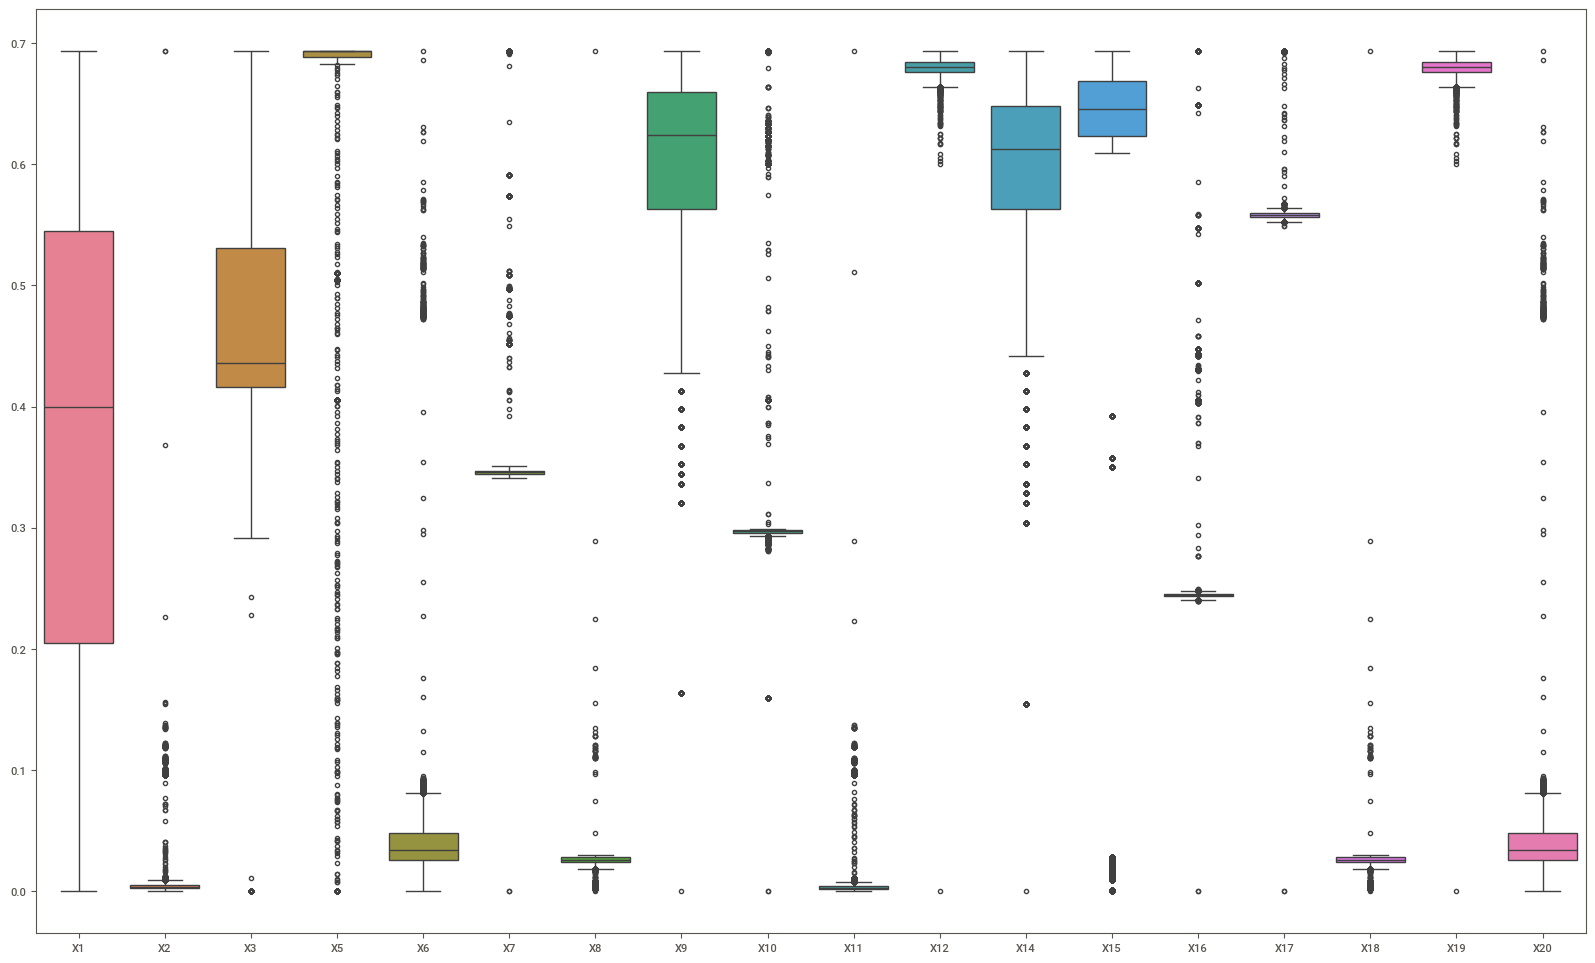

In [107]:
## 이상치 확인
import seaborn as sns
plt.figure(figsize=(20, 12))
sns.boxplot(data=data.drop(columns=['Y']))
plt.show()


#### 3-2) 데이터 클린징

In [108]:
## 데이터 전처리 전 Y값 확인
data['Y'].value_counts(), data['Y'].value_counts(normalize=True)

(0    470000
 1     57000
 Name: Y, dtype: int64,
 0    0.891841
 1    0.108159
 Name: Y, dtype: float64)

In [109]:
def remove_outliers(df, threshold=99.9):
    clean_df = df.copy()
    for col in clean_df.columns:
        ## 🔥 제외할 변수 넣기
        if 'Y' not in col :
            upper_threshold = np.percentile(clean_df[col], threshold)
            lower_threshold = np.percentile(clean_df[col], 100 - threshold)
            print("✅ col:", col, "상한값:", upper_threshold, "하한값:", lower_threshold)
            clean_df = clean_df[(clean_df[col] <= upper_threshold) & (clean_df[col] >= lower_threshold)]
    return clean_df.reset_index(drop=True)

df = remove_outliers(data)


✅ col: X1 상한값: 0.6925900638400002 하한값: 0.001037083
✅ col: X2 상한값: 0.09704374815000172 하한값: 0.0008055859799999898
✅ col: X3 상한값: 0.6264303992000065 하한값: 0.0
✅ col: X5 상한값: 0.6931472 하한값: 0.0
✅ col: X6 상한값: 0.08703302630000104 하한값: 0.012275252
✅ col: X7 상한값: 0.6931472 하한값: 0.34187442
✅ col: X8 상한값: 0.029109785 하한값: 0.00572576540199989
✅ col: X9 상한값: 0.6931472 하한값: 0.33647224
✅ col: X10 상한값: 0.6930396 하한값: 0.29384717
✅ col: X11 상한값: 0.09692790995000035 하한값: 0.000958465
✅ col: X12 상한값: 0.68995464 하한값: 0.6650903
✅ col: X14 상한값: 0.6931472 하한값: 0.33647224
✅ col: X15 상한값: 0.6930556 하한값: 0.000183092
✅ col: X16 상한값: 0.6931472 하한값: 0.24016052
✅ col: X17 상한값: 0.6930611 하한값: 0.5524764
✅ col: X18 상한값: 0.028994165 하한값: 0.016832959
✅ col: X19 상한값: 0.6895068 하한값: 0.6661296
✅ col: X20 상한값: 0.072988145 하한값: 0.012275252


In [110]:
## 데이터 전처리 후 Y값 확인
df['Y'].value_counts(), df['Y'].value_counts(normalize=True)

(0    460371
 1     54943
 Name: Y, dtype: int64,
 0    0.89338
 1    0.10662
 Name: Y, dtype: float64)

In [111]:
df

,X1,X2,X3,X5,X6,X7,X8,X9,X10,X11,X12,X14,X15,X16,X17,X18,X19,X20,Y
0,0.202296,0.003560,0.411261,0.693147,0.036360,0.343512,0.028087,0.681974,0.295769,0.003053,0.682731,0.681974,0.016330,0.242926,0.557461,0.028087,0.682731,0.036360,0
1,0.006836,0.007688,0.597304,0.686838,0.067407,0.347869,0.028640,0.497403,0.297943,0.005816,0.680891,0.497403,0.670040,0.245876,0.561336,0.028640,0.680891,0.067407,0
2,0.609621,0.001461,0.466186,0.693090,0.018944,0.345032,0.024502,0.647685,0.298255,0.001475,0.685525,0.647685,0.648486,0.243602,0.559431,0.024502,0.685525,0.018944,0
3,0.074007,0.003072,0.535876,0.693147,0.031475,0.347502,0.025393,0.587787,0.296057,0.002462,0.677980,0.575364,0.632563,0.246078,0.556761,0.025393,0.677980,0.031475,0
4,0.198356,0.007020,0.416238,0.686838,0.061888,0.347441,0.028450,0.537143,0.298167,0.005314,0.673286,0.537143,0.671124,0.245505,0.561695,0.028450,0.673286,0.061888,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515309,0.612937,0.001173,0.401400,0.693147,0.015237,0.346218,0.020338,0.470004,0.298167,0.001164,0.679403,0.483797,0.664080,0.243377,0.561398,0.020338,0.679403,0.015237,1
515310,0.512265,0.002282,0.395505,0.688810,0.021745,0.342540,0.024307,0.681974,0.297209,0.002300,0.687581,0.670674,0.658006,0.240500,0.555487,0.024307,0.687581,0.021745,1
515311,0.390334,0.008615,0.415327,0.693147,0.068450,0.451511,0.028167,0.470004,0.599760,0.007902,0.680428,0.456017,0.682601,0.693147,0.693040,0.028167,0.680428,0.068450,1
515312,0.512265,0.002267,0.394744,0.688810,0.020826,0.341926,0.024307,0.693147,0.296889,0.002346,0.689263,0.681974,0.658006,0.240500,0.557215,0.024307,0.689263,0.020826,1


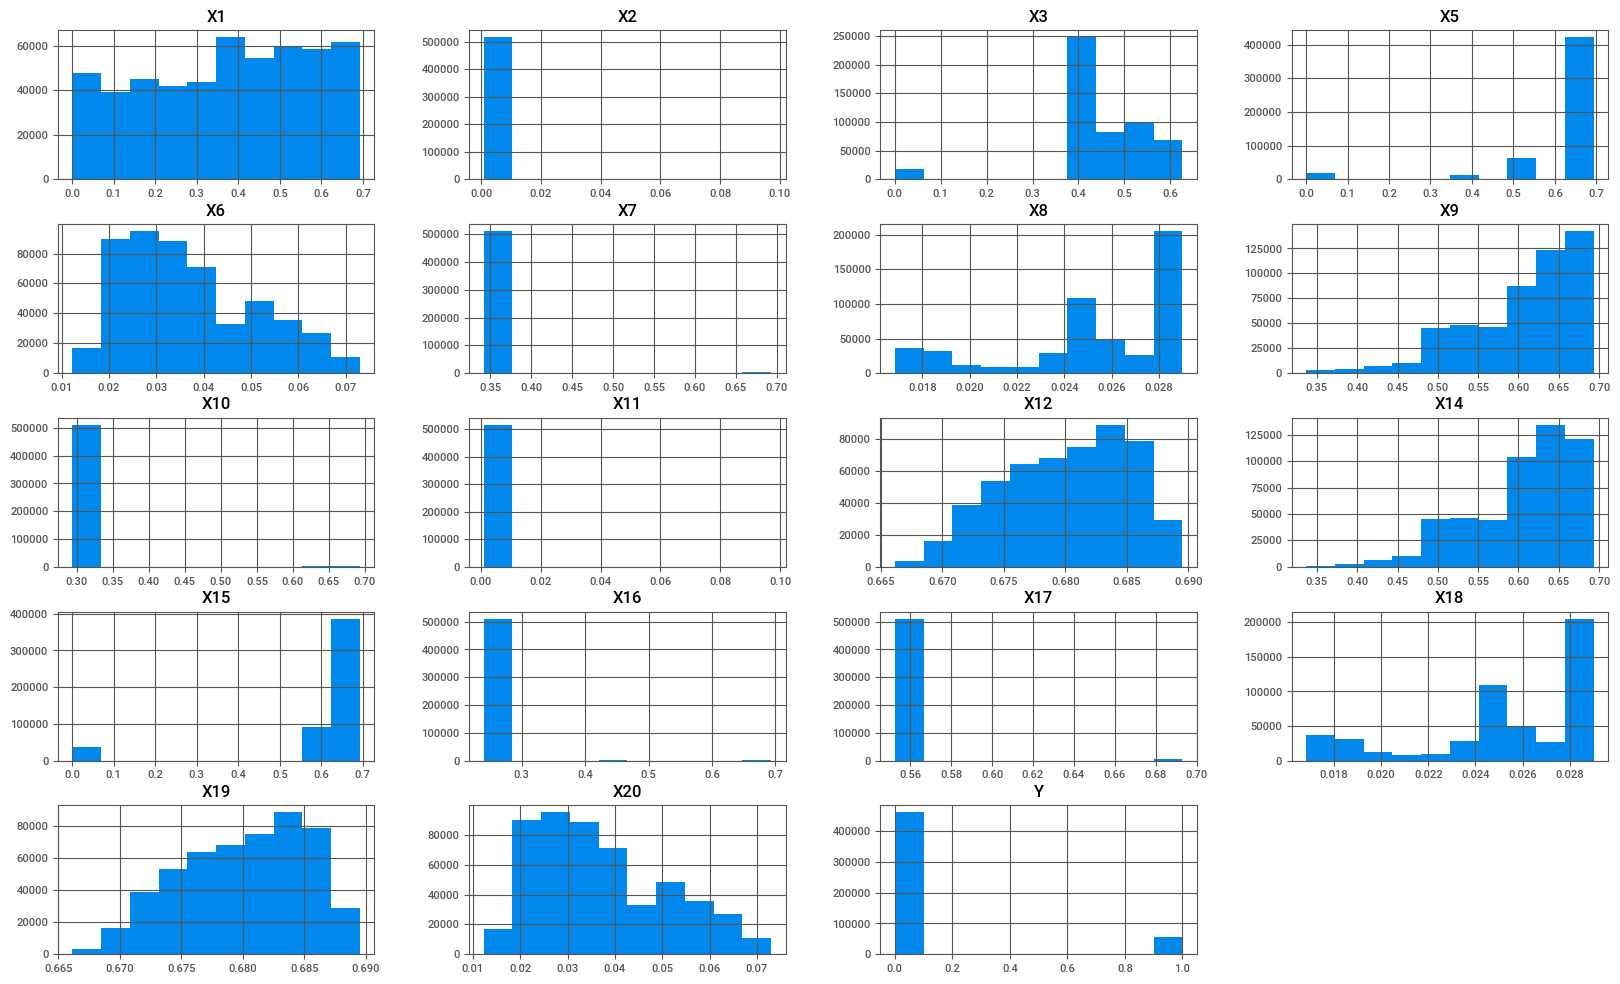

In [112]:
## data 전체 변수별 분포 확인
df.hist(figsize=(20, 12))
plt.show()

#### 3-3) 데이터 시각화

- 백분위수를 이용한 이상치 제거가 되었다. 
- 변수별 상,하위 0.1%를 제거하였다.
- Y의 비율이 크게 떨어지지 않아 괜찮은것으로 보인다.

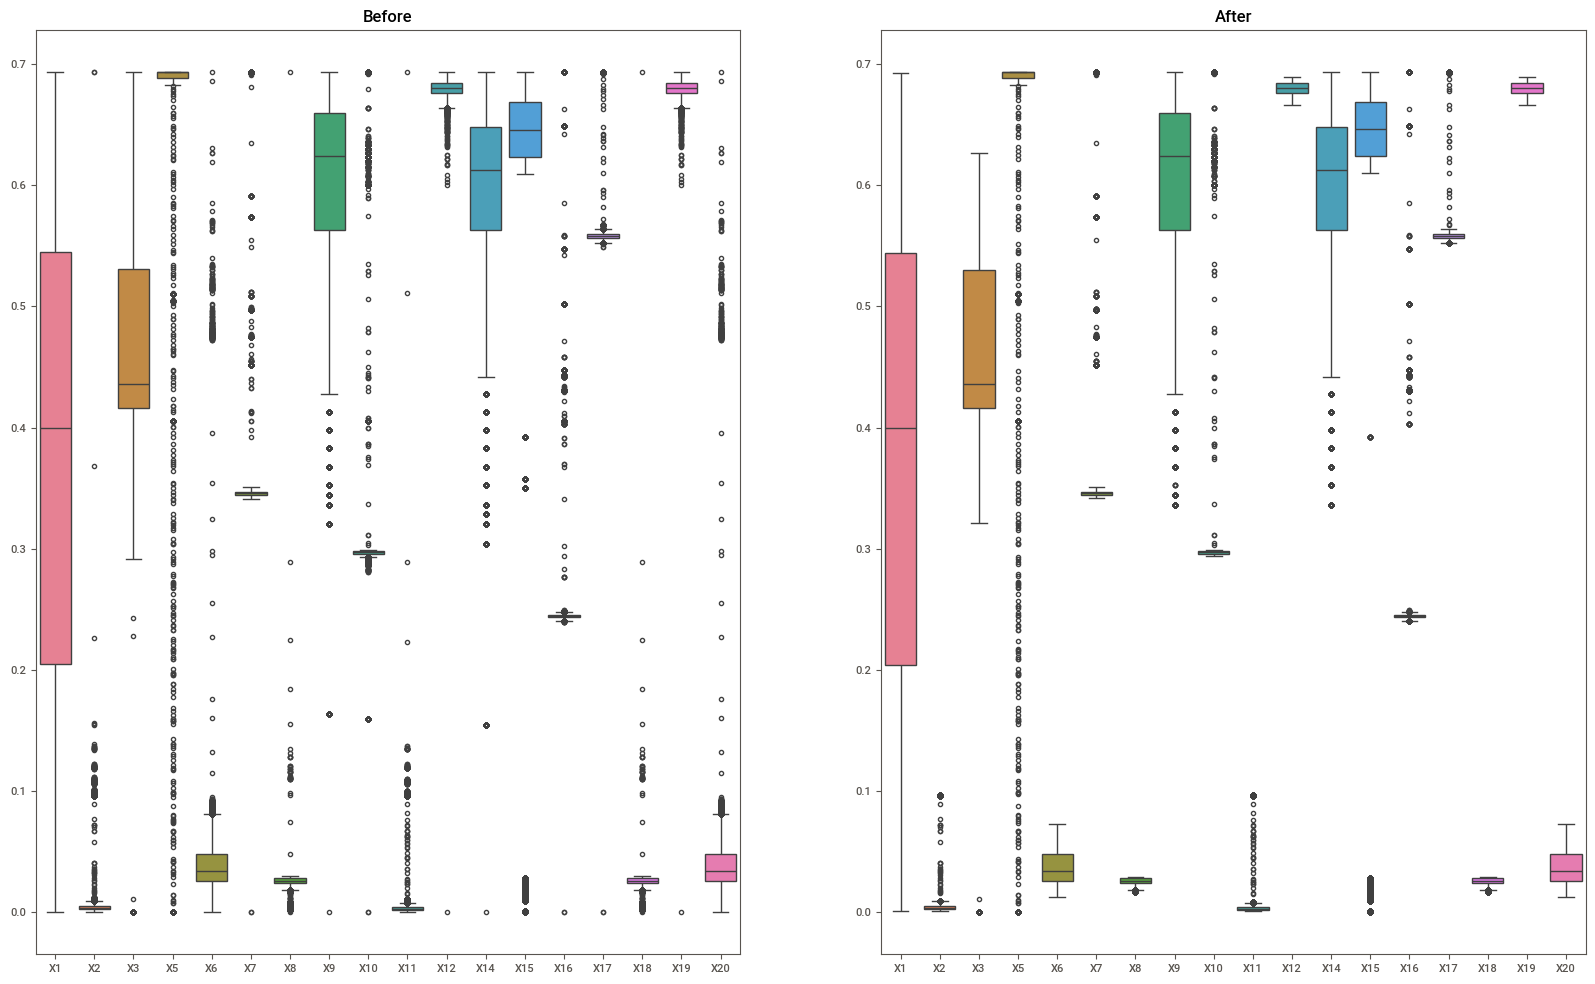

In [113]:
plt.figure(figsize=(20, 12))

# 전처리 전 데이터프레임 시각화
plt.subplot(1, 2, 1)
sns.boxplot(data=data.drop(columns=['Y']))
plt.title('Before')

# 전처리 후 데이터프레임 시각화
plt.subplot(1, 2, 2)
sns.boxplot(data=df.drop(columns=['Y']))
plt.title('After')

plt.show()

#### 3-4) 가설설정 (질문하기)

- 정상/불량 그룹간 변수별 차이가 있을까? 
- 다중공선성을 제거하고, 안 제거하고는 모델에 영향을 줄까? 
- Y에 가장 영향을 주는 변수는 무엇일까?
- 기타 등등

### 4. 피처 엔지니어링

#### 4-1) T-test로 정상/불량품 그룹간 변수의 차이가 있는지 확인

In [114]:
## T-test 검정
t_test = []

for idx, col in enumerate(df.columns):
    t = scipy.stats.ttest_ind(df[df['Y']==0][col], 
                              df[df['Y']==1][col])
    t_test.append([col, t[0], t[1]])

t_test_df = pd.DataFrame(t_test, columns=['col', 't', 'p-value'])

## P-value가 0.05보다 작은 변수만 추출
t_test_df = t_test_df[t_test_df['p-value']<0.05]
t_test_df

,col,t,p-value
0,X1,70.852212,0.000000e+00
1,X2,-7.812500,5.616932e-15
2,X3,533.182626,0.000000e+00
3,X5,371.014174,0.000000e+00
4,X6,64.388654,0.000000e+00
5,X7,-179.034552,0.000000e+00
6,X8,234.987205,0.000000e+00
7,X9,138.365668,0.000000e+00
8,X10,-195.408440,0.000000e+00
9,X11,-57.806282,0.000000e+00


In [115]:
## P-value가 0.05보다 작은 변수만 추출
t_test_df = t_test_df[t_test_df['p-value']<0.05]
t_test_df

,col,t,p-value
0,X1,70.852212,0.000000e+00
1,X2,-7.812500,5.616932e-15
2,X3,533.182626,0.000000e+00
3,X5,371.014174,0.000000e+00
4,X6,64.388654,0.000000e+00
5,X7,-179.034552,0.000000e+00
6,X8,234.987205,0.000000e+00
7,X9,138.365668,0.000000e+00
8,X10,-195.408440,0.000000e+00
9,X11,-57.806282,0.000000e+00


In [116]:
## 귀무가설 기각된 변수만 추출
cols = t_test_df['col'].tolist()

In [117]:
cols

['X1',
 'X2',
 'X3',
 'X5',
 'X6',
 'X7',
 'X8',
 'X9',
 'X10',
 'X11',
 'X12',
 'X14',
 'X15',
 'X16',
 'X17',
 'X18',
 'X19',
 'X20',
 'Y']

In [118]:
train_df = df[cols].reset_index(drop=True)

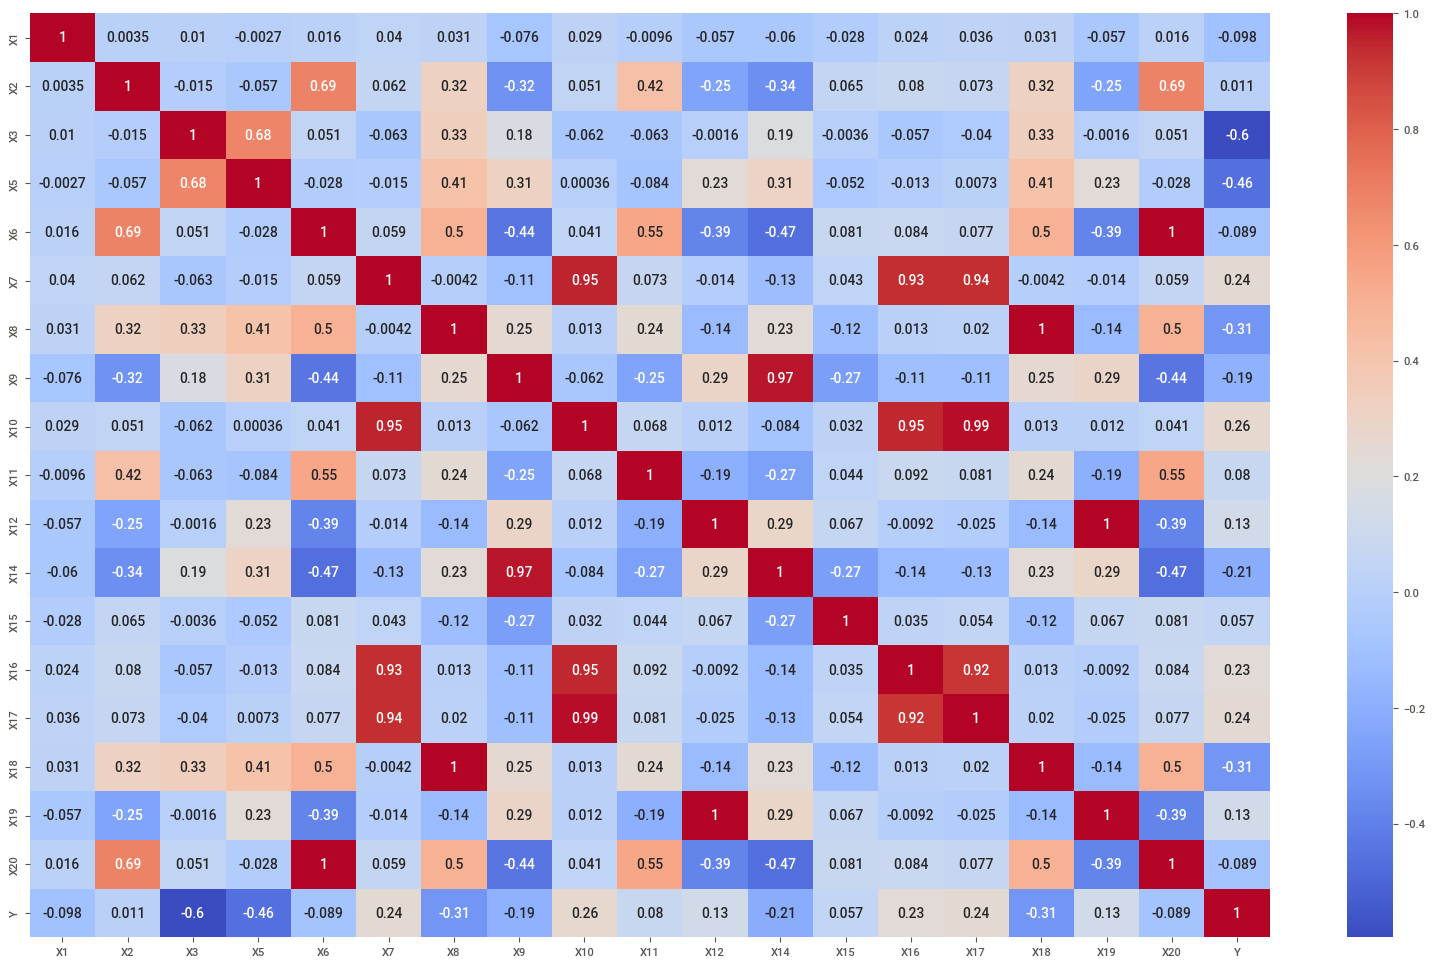

In [119]:
## 전체 변수 상관계수 시각화
plt.figure(figsize=(20, 12))
sns.heatmap(train_df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [120]:
## 상관관계가 1로 동일한 변수 확인
def get_correlation(df, target_column):
    corr = df.corr()
    correlation_with_target = corr[target_column].drop(target_column)
    columns_with_corr_1 = correlation_with_target[correlation_with_target == 1].index.tolist()
    return columns_with_corr_1

same_cols = []
for idx, col in enumerate(train_df.columns):
    print(col, get_correlation(train_df, col))
    if len(get_correlation(train_df, col)) > 0:
        same_cols.append(col)

X1 []
X2 []
X3 []
X5 []
X6 ['X20']
X7 []
X8 ['X18']
X9 []
X10 []
X11 []
X12 ['X19']
X14 []
X15 []
X16 []
X17 []
X18 ['X8']
X19 ['X12']
X20 ['X6']
Y []


In [121]:
# 중복 변수 제거
train_df = train_df.drop(['X18', 'X19', 'X20'], axis=1)

In [122]:
## 다중공선성 계산
from statsmodels.stats.outliers_influence import variance_inflation_factor

## VIF를 계산하는 함수
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
    return vif_data

vif_df = calculate_vif(train_df.drop('Y', axis=1))

In [123]:
vif_df.sort_values(['VIF'], ascending=False)

,Feature,VIF
14,X17,24346.758115
10,X12,15522.186576
8,X10,2834.926128
5,X7,2092.175017
11,X14,1810.905615
7,X9,1521.664176
13,X16,937.074475
6,X8,139.083934
3,X5,50.219651
2,X3,39.684893


- 다중공선성이 큰 변수가 존재한다.
- 전체 변수의 상관계수 시각화

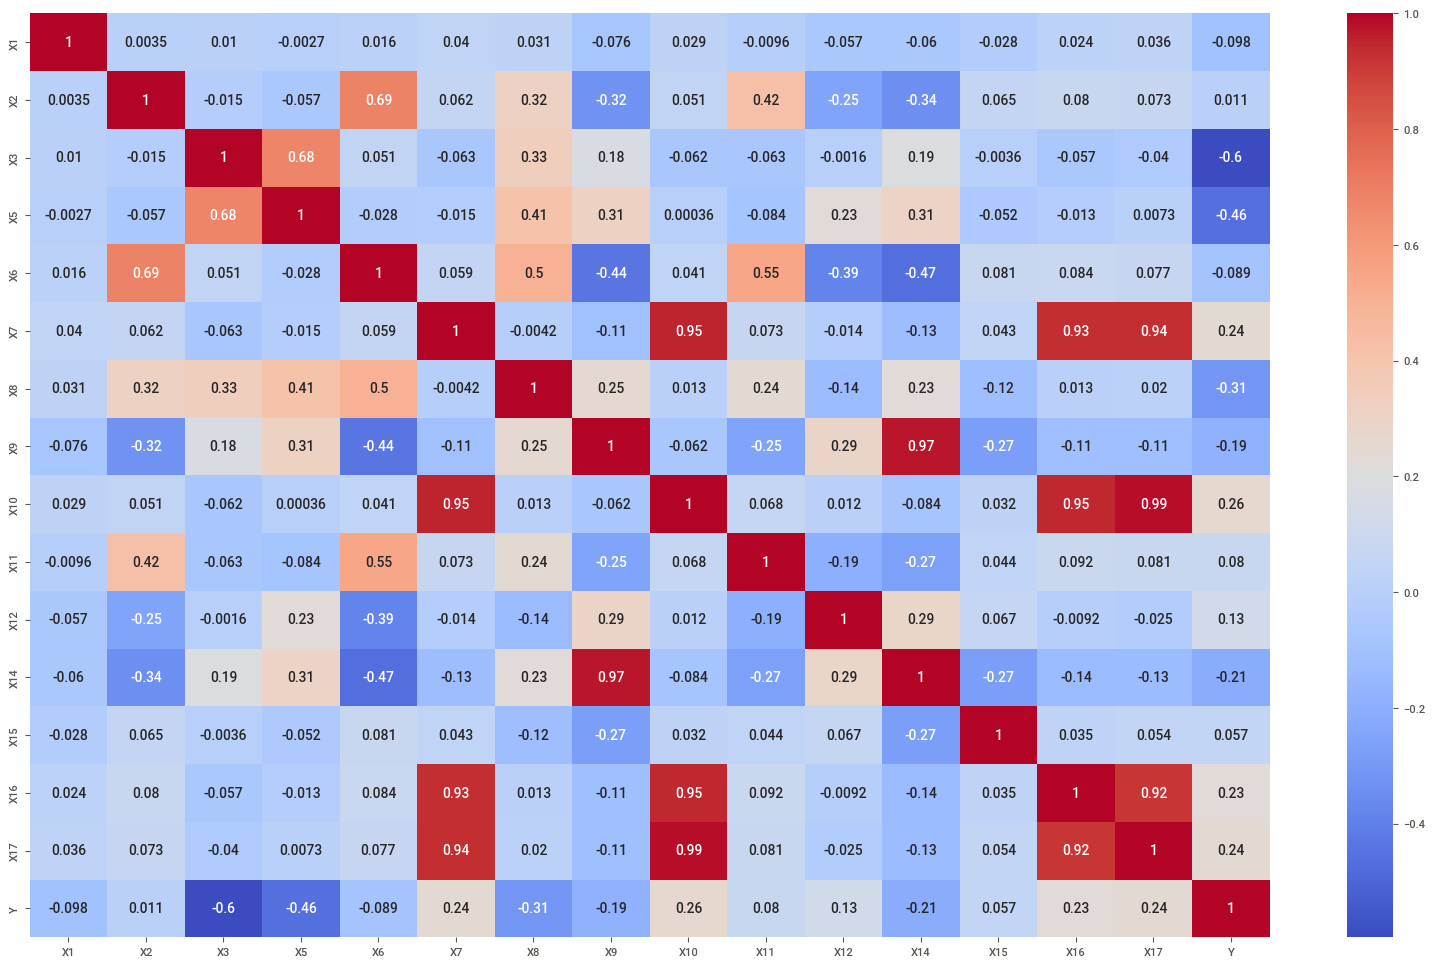

In [124]:
## 전체 변수 상관계수 시각화
plt.figure(figsize=(20, 12))
sns.heatmap(train_df.corr(), annot=True, cmap='coolwarm')
plt.show()

##### X17, X16, X9, X6은 서로 영향을 주므로 다중공선성이 큼.
- 차원축소를 하게 되면, 최적값을 찾기 어려우므로, 가장 다중공선성이 큰 X17를 지우고 모델을 만들어 봄.
- 단, X17를 넣고, 안 넣고로 가설을 시험해볼만 함.

### Baseline 모델로 XGBoost로 진행

In [125]:
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [126]:
X_features = train_df.drop('Y', axis=1)
y_target = train_df['Y']

# 전체 데이터 중 80%는 학습용 데이터, 20%는 테스트용 데이터 추출
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.3, random_state=0, stratify=y_target)

In [127]:
print('학습 데이터 레이블 값 비율')
print(y_train.value_counts(normalize=True) * 100)
print('\n테스트 데이터 레이블 값 비율')
print(y_test.value_counts(normalize=True) * 100)

학습 데이터 레이블 값 비율
0    89.337961
1    10.662039
Name: Y, dtype: float64

테스트 데이터 레이블 값 비율
0    89.337948
1    10.662052
Name: Y, dtype: float64


In [128]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)

xgb_pred = xgb_clf.predict(X_test)
xgb_pred_proba = xgb_clf.predict_proba(X_test)[:, 1]

get_clf_eval(y_test, xgb_pred, xgb_pred_proba)

오차 행렬
[[138110      2]
 [    33  16450]]
정확도: 0.9998, 정밀도: 0.9999, 재현율: 0.9980,    F1: 0.9989, AUC:0.9999


In [54]:
from xgboost import XGBClassifier

## X17 제거 한 데이터
X_kwk_train = X_train.drop('X17', axis=1)
X_kwk_test = X_test.drop('X17', axis=1)

xgb_clf = XGBClassifier()
xgb_clf.fit(X_kwk_train, y_train)

xgb_pred = xgb_clf.predict(X_kwk_test)
xgb_pred_proba = xgb_clf.predict_proba(X_kwk_test)[:, 1]

get_clf_eval(y_test, xgb_pred, xgb_pred_proba)

오차 행렬
[[138111      1]
 [    36  16447]]
정확도: 0.9998, 정밀도: 0.9999, 재현율: 0.9978,    F1: 0.9989, AUC:0.9998


- 미비하지만 X17까지 추가한 데이터의 성능이 다소 높다.

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

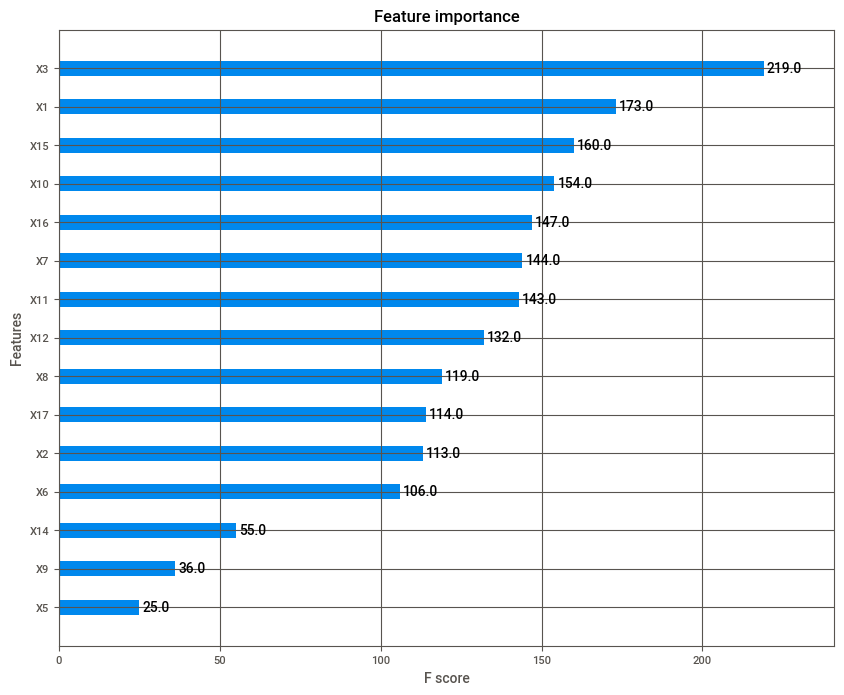

In [129]:
## 변수 중요도
from xgboost import plot_importance

fig, ax = plt.subplots(1,1,figsize=(10,8))
plot_importance(xgb_clf, ax=ax, max_num_features=20, height=0.4)

### 4-3) PDP 변수 영향도 분석

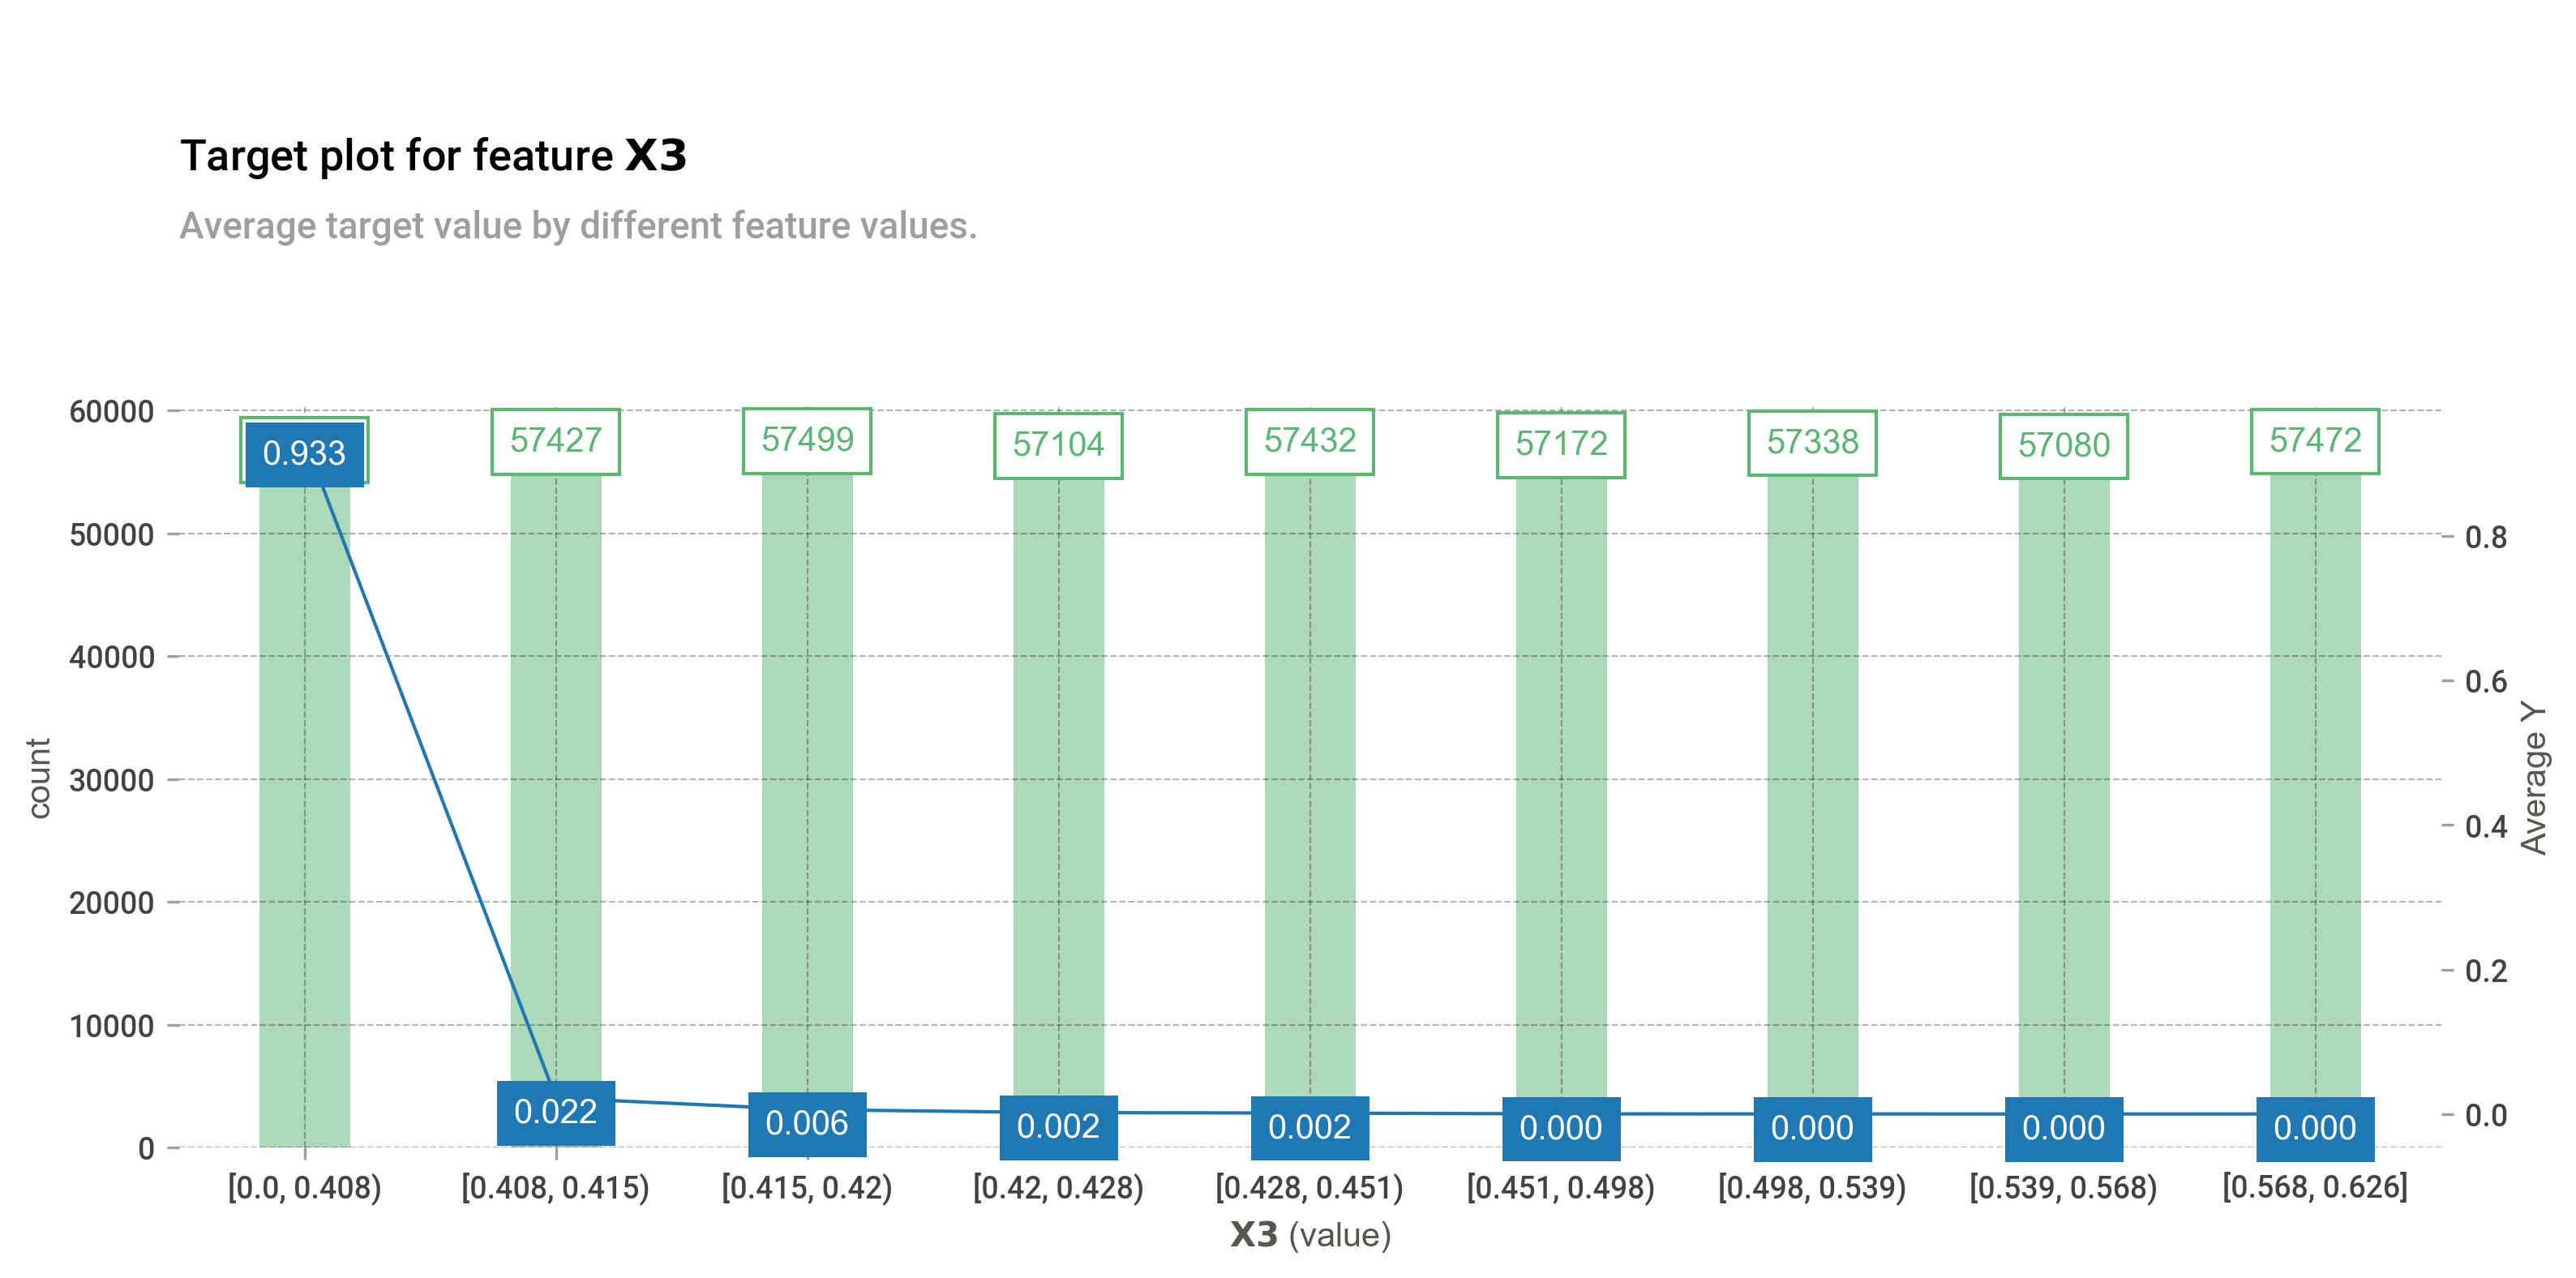

In [130]:
from pdpbox import info_plots

X_feature = X_train.columns
Y_target = 'Y'

target_plot = info_plots.TargetPlot(
    df=train_df,
    feature='X3',
    feature_name='X3',
    target=Y_target,
)

fig, axes, summary_df = target_plot.plot(
    figsize=(12, 6),
    plot_params=None,
    engine='matplotlib',
)


- X3 변수의 작은 구간이면, 93%의 확률로 불량이다.

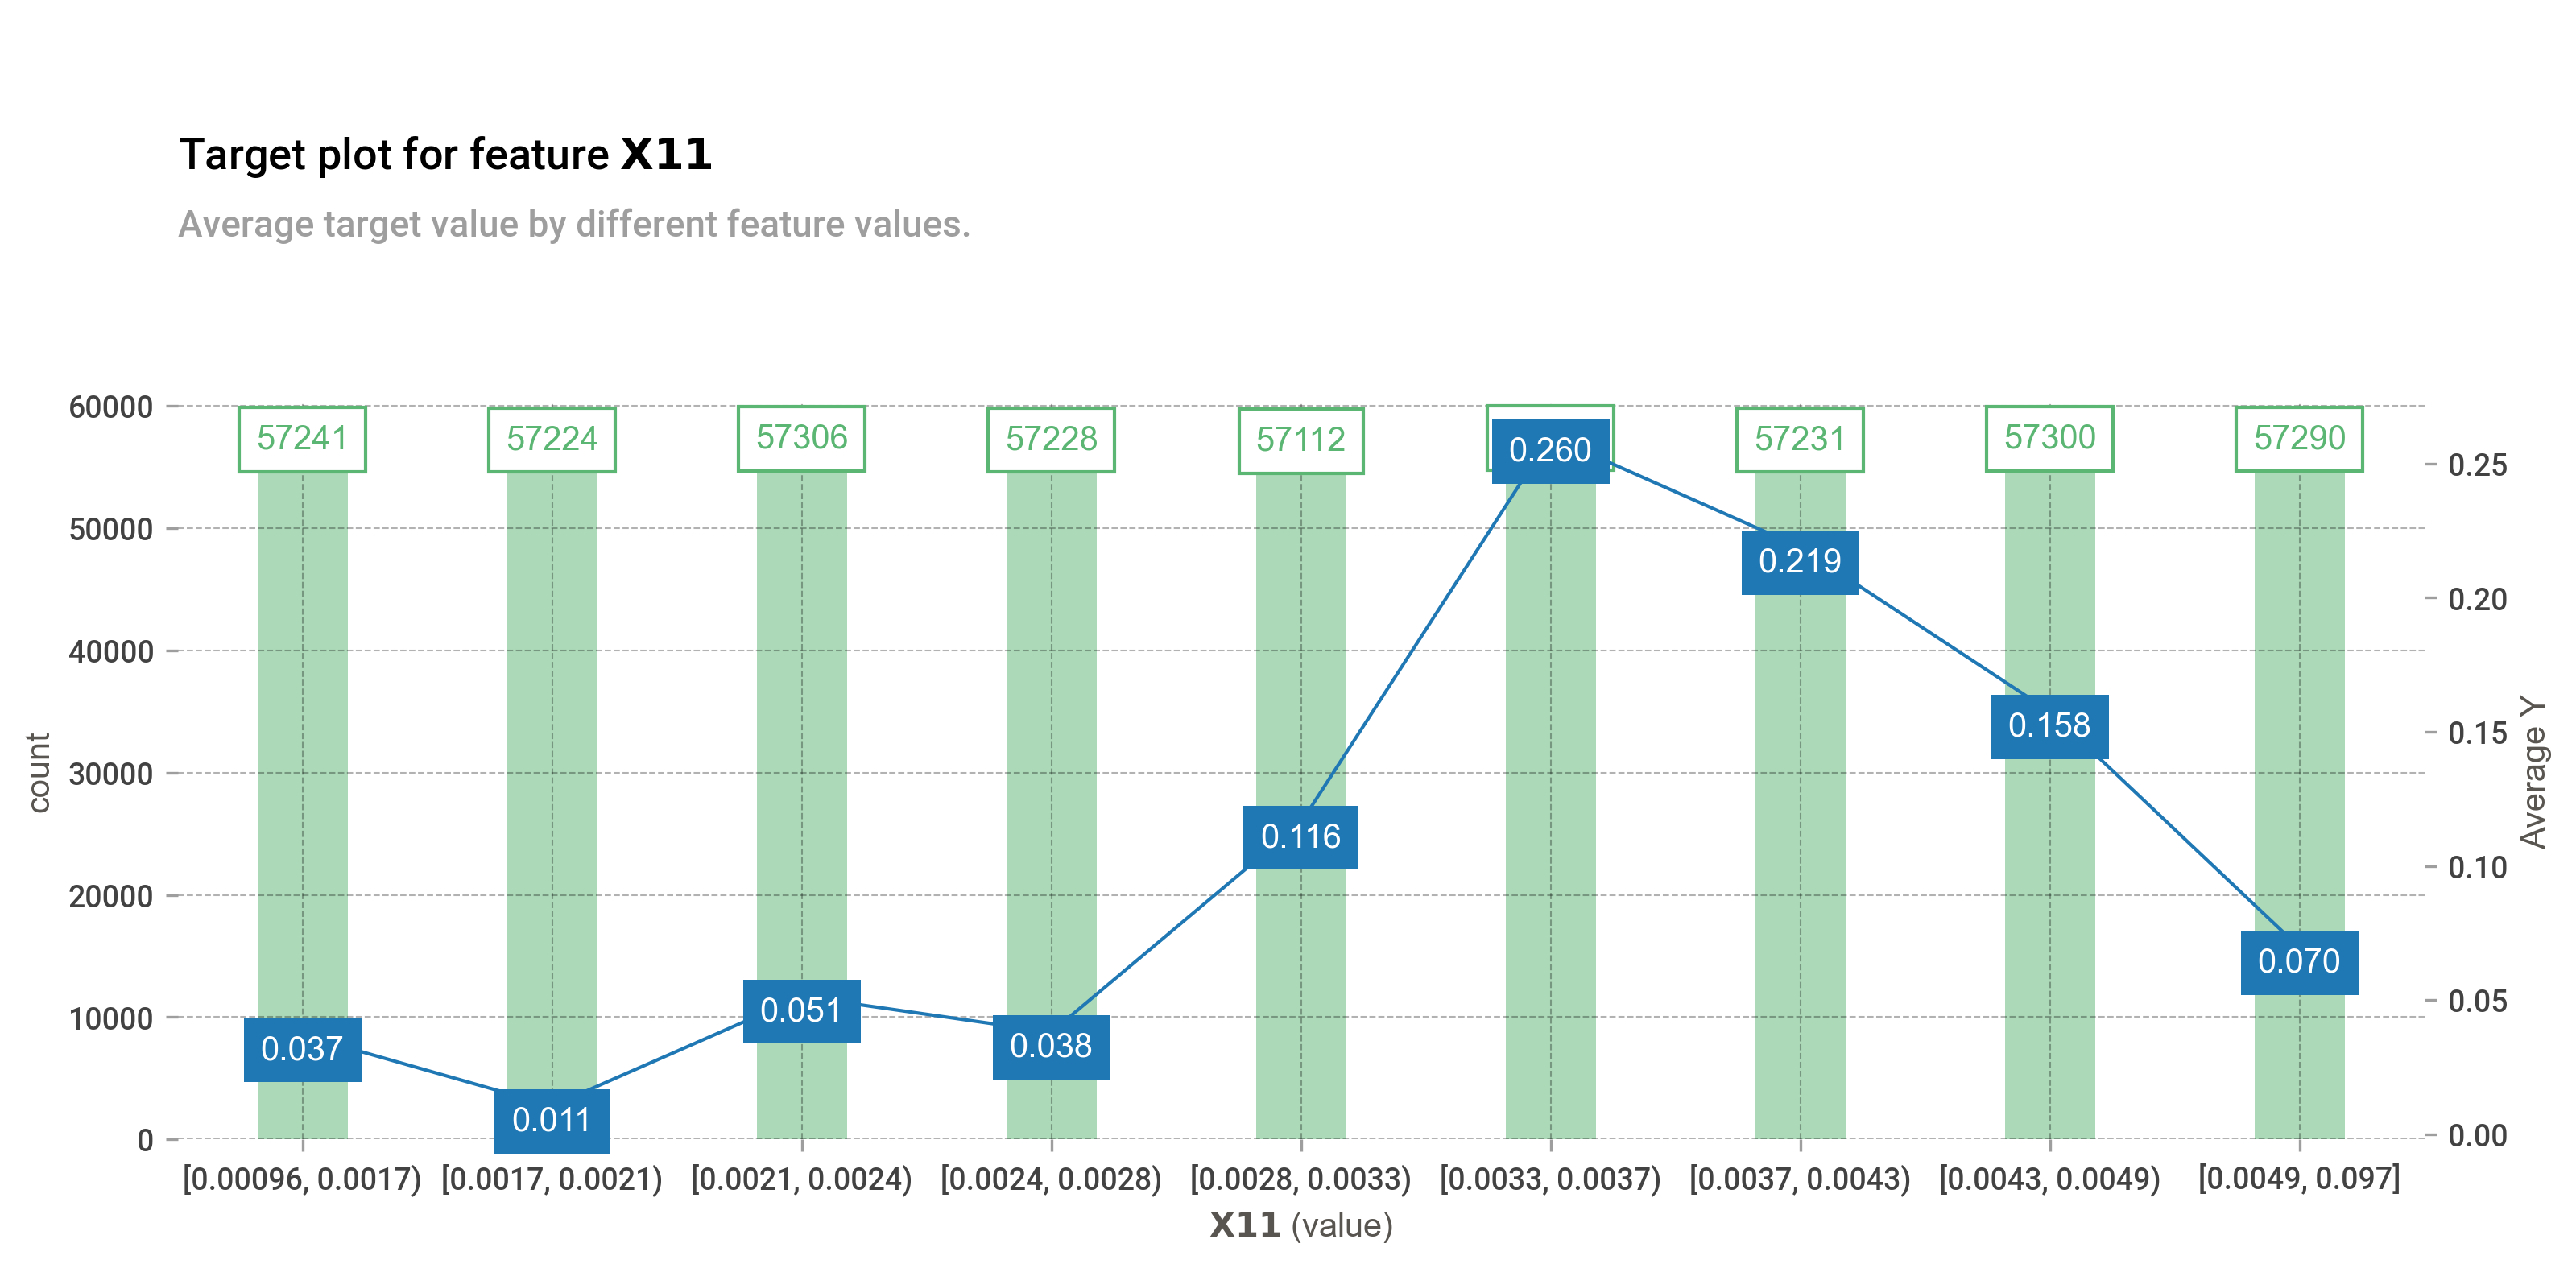

In [131]:
target_plot = info_plots.TargetPlot(
    df=train_df,
    feature='X11',
    feature_name='X11',
    target=Y_target,
)

fig, axes, summary_df = target_plot.plot(
    figsize=(12, 6),
    plot_params=None,
    engine='matplotlib',
)



#### 두 변수 간 관계로 PDP 분석

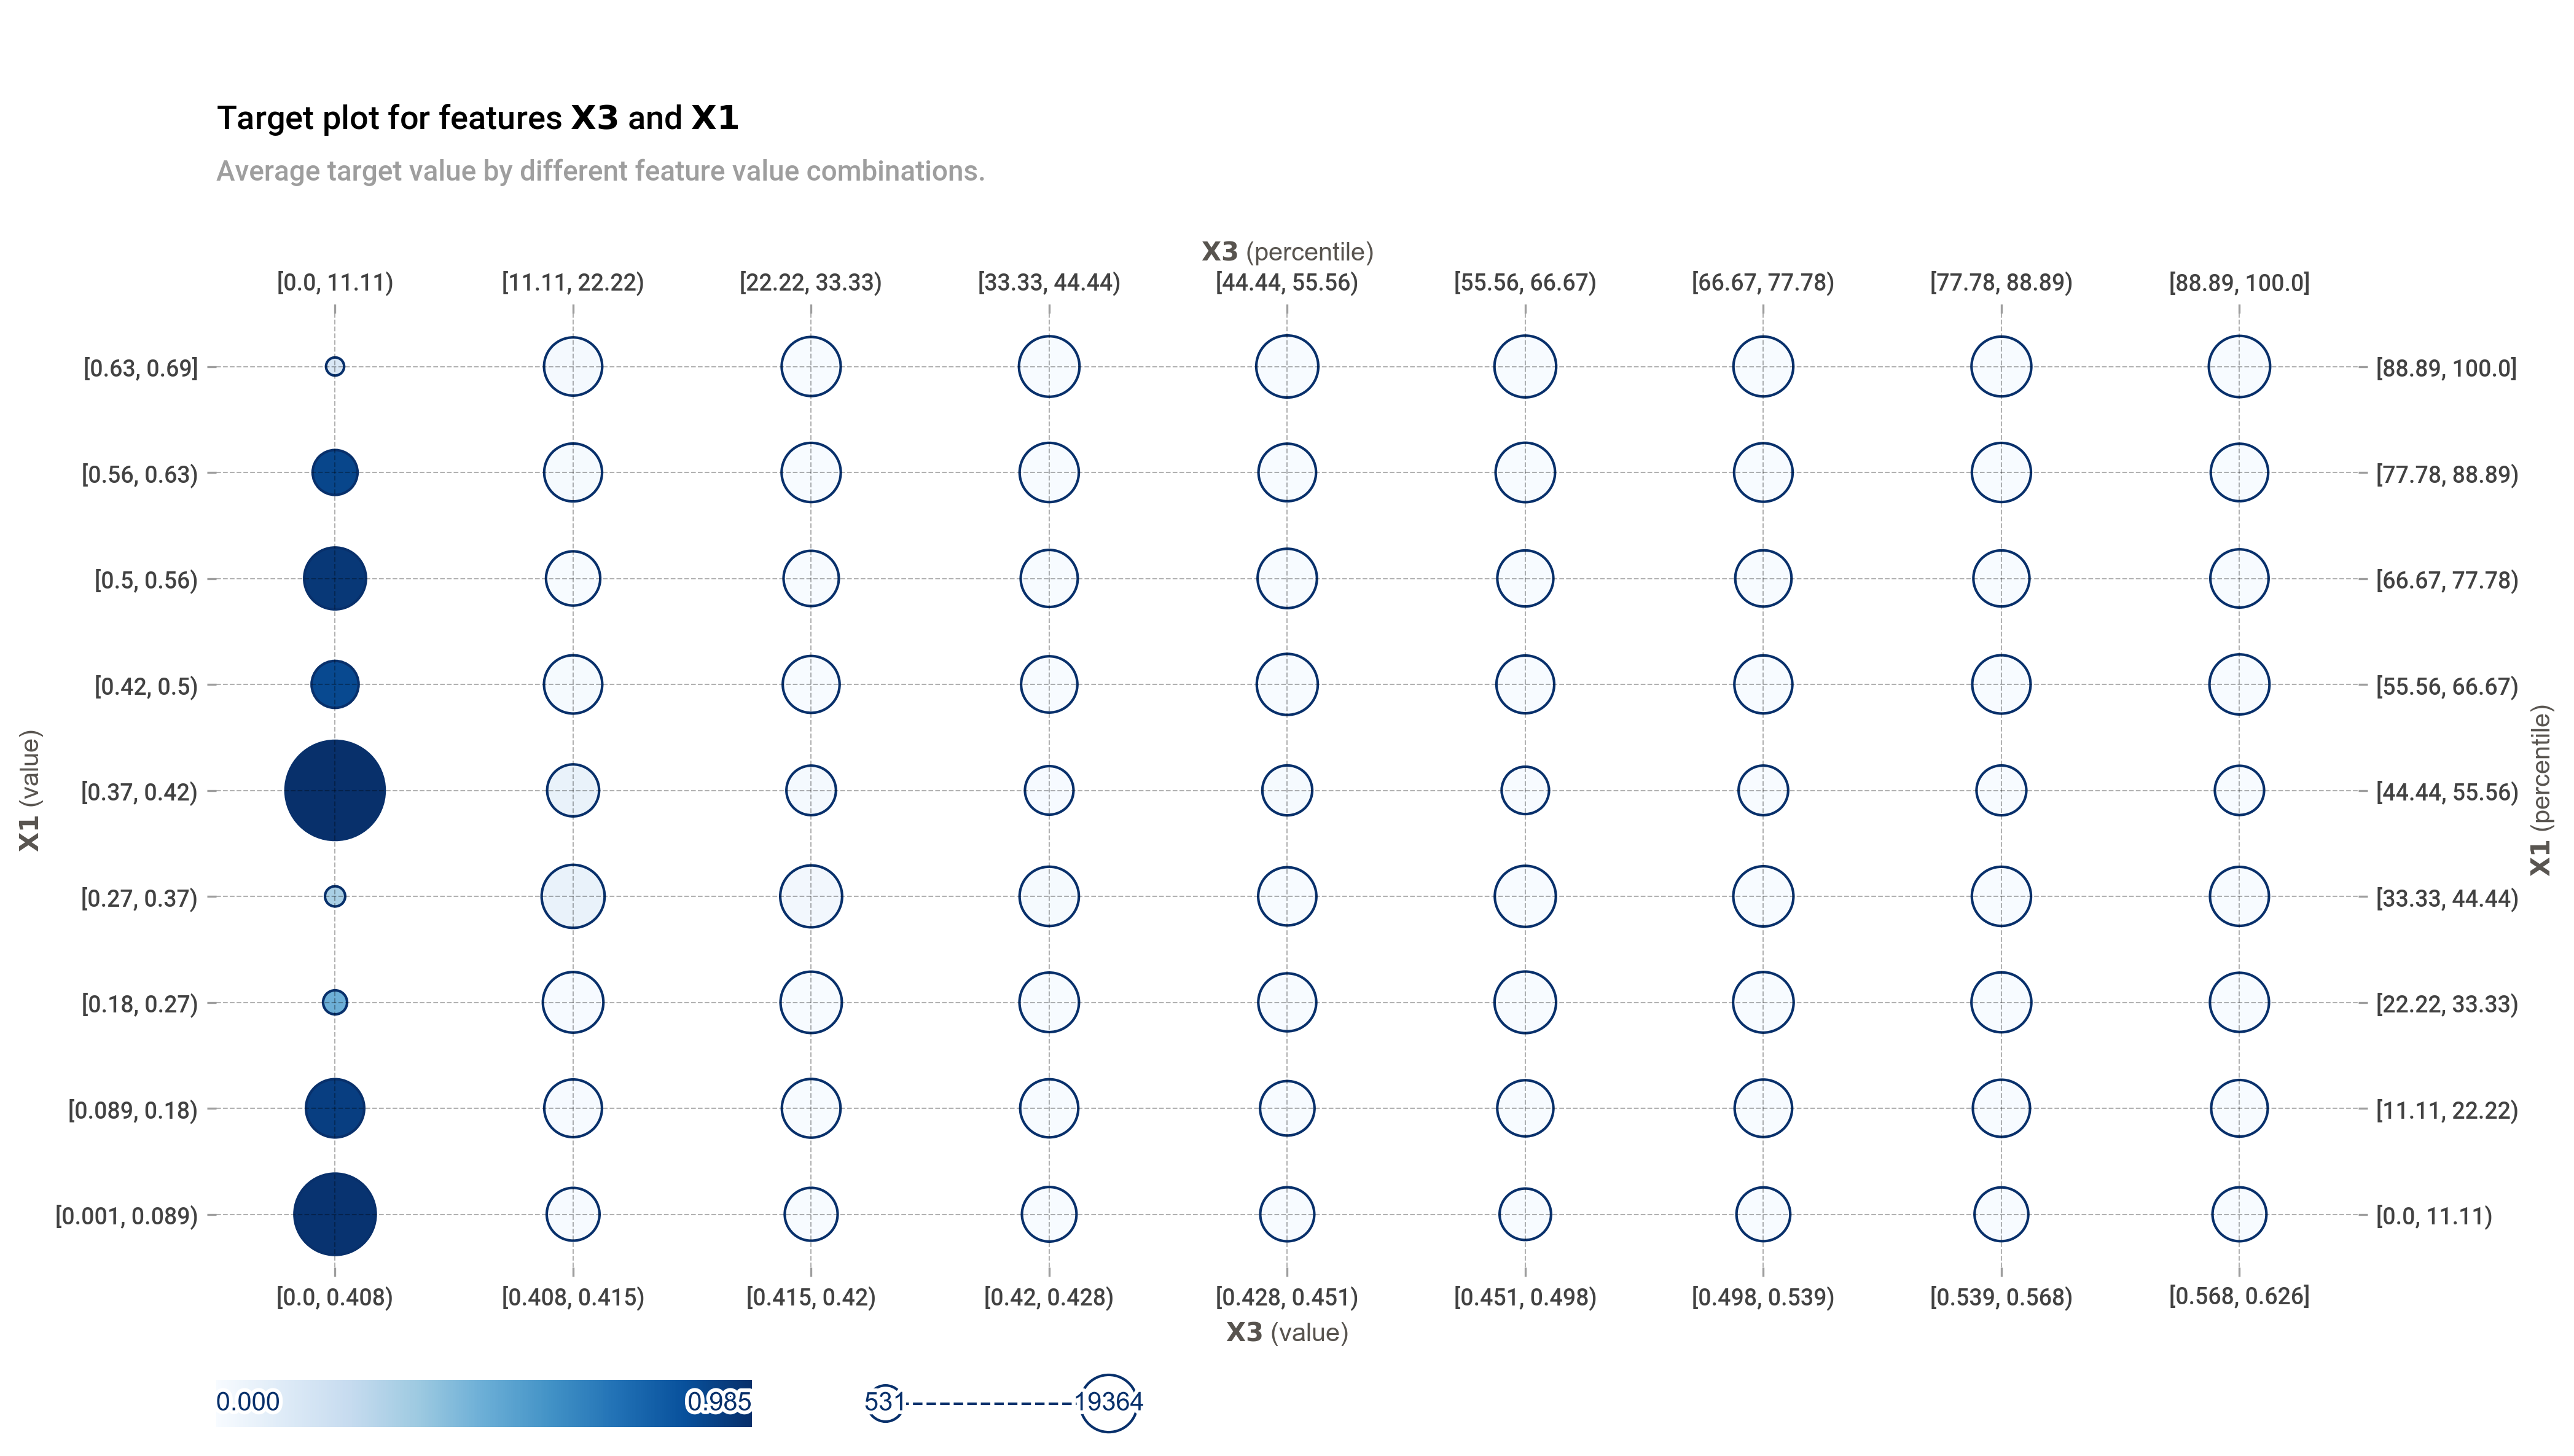

In [132]:
target_interact_target = info_plots.InteractTargetPlot(
    df=train_df,
    features=['X3', 'X1'],
    feature_names=['X3', 'X1'],
    target=Y_target,
)

fig6, axes6, summary_df6 = target_interact_target.plot(
    show_percentile=True,
    figsize=(15, 10),
    engine='matplotlib',
)

- 원의 크기 : 학습데이터 
- 원의 크기가 작을수록 사례가 적고, 원이 커질수록 사례가 많음을 의미함. 
- 원의 색깔 : 불량품 예측 확률 (진할 수록 높다)

#### ✅ X3이 작은 구간에서 X1이 특정 구간일때 불량이 발생한다.

#### 4-4) SHAP 방법론으로 변수 영향도 분석

In [133]:
import shap

shap.initjs()
explainer = shap.TreeExplainer(xgb_clf)
shap_values = explainer.shap_values(X_train)


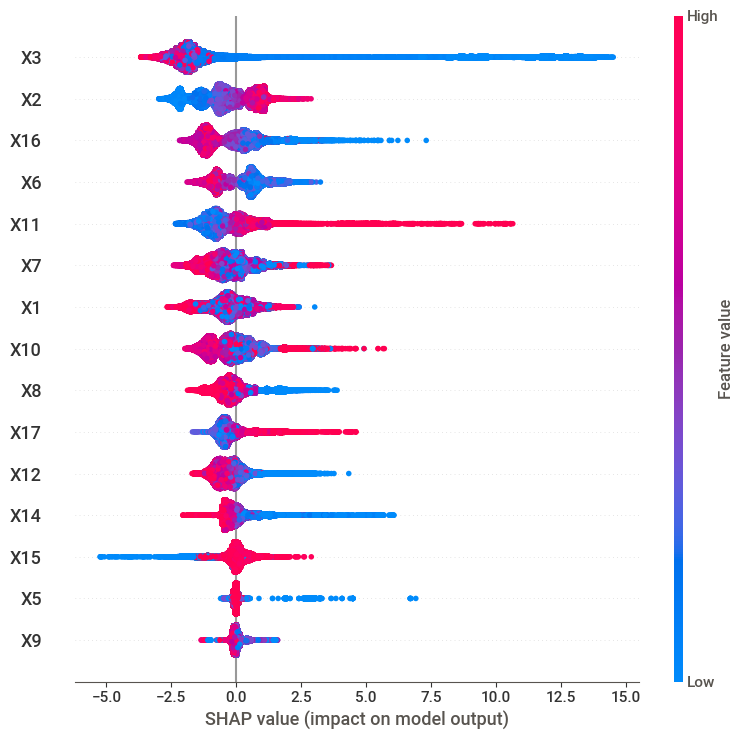

In [134]:
shap.summary_plot(shap_values, X_train)

In [135]:
train_df.groupby(['Y'])['X3'].describe()

,count,mean,std,min,25%,50%,75%,max
Y,,,,,,,,
0,460371.0,0.477000,0.062885,0.40534,0.419789,0.450239,0.538808,0.626423
1,54943.0,0.272857,0.185345,0.00000,0.000000,0.395758,0.398120,0.609449


In [136]:
train_df.groupby(['Y'])['X2'].describe()

,count,mean,std,min,25%,50%,75%,max
Y,,,,,,,,
0,460371.0,0.003818,0.002573,0.000806,0.002294,0.003432,0.005213,0.097043
1,54943.0,0.003905,0.001314,0.000936,0.003352,0.003756,0.004549,0.009636


In [137]:
train_df.groupby(['Y'])['X16'].describe()

,count,mean,std,min,25%,50%,75%,max
Y,,,,,,,,
0,460371.0,0.244433,0.001147,0.240330,0.243513,0.244433,0.245302,0.249108
1,54943.0,0.265166,0.083699,0.240161,0.241879,0.243208,0.243940,0.693147


In [138]:
train_df.groupby(['Y'])['X11'].describe()

,count,mean,std,min,25%,50%,75%,max
Y,,,,,,,,
0,460371.0,0.003166,0.00224,0.000959,0.002069,0.002900,0.004198,0.096927
1,54943.0,0.003729,0.00125,0.000958,0.003239,0.003592,0.004294,0.096319


In [139]:
train_df.groupby(['Y'])['X11'].describe()

,count,mean,std,min,25%,50%,75%,max
Y,,,,,,,,
0,460371.0,0.003166,0.00224,0.000959,0.002069,0.002900,0.004198,0.096927
1,54943.0,0.003729,0.00125,0.000958,0.003239,0.003592,0.004294,0.096319


##### ✅ X3은 값이 낮을 수록 불량품이 발생하며, X11은 값이 높을수록 불량품이 발생한다.

### 최적값을 찾기위해 의사결정나무로 시각화

In [140]:
import graphviz
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(random_state=42, 
                                max_depth=5,
                                )

dt_clf.fit(X_train, y_train)

dt_pred = dt_clf.predict(X_test)
dt_pred_proba = dt_clf.predict_proba(X_test)[:, 1]
## ROC-AUC 추가

get_clf_eval(y_test, dt_pred, dt_pred_proba)

오차 행렬
[[138110      2]
 [   200  16283]]
정확도: 0.9987, 정밀도: 0.9999, 재현율: 0.9879,    F1: 0.9938, AUC:0.9940


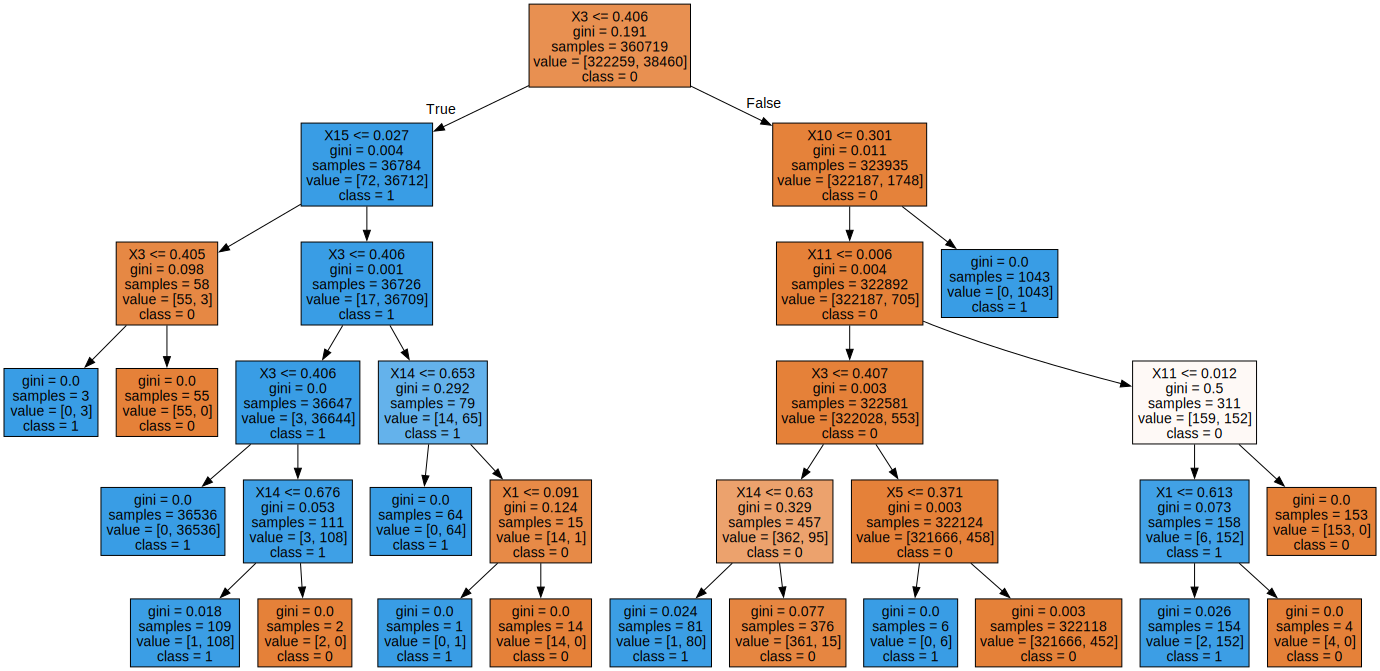

In [141]:
export_graphviz(dt_clf, out_file="tree.dot", 
                class_names=['0','1'],
                feature_names = X_features.columns, 
                impurity=True, 
                filled=True)

# 위에서 생성된 tree.dot 파일을 Graphviz 읽어서 Jupyter Notebook상에서 시각화 
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

## 분석결과

In [142]:
train_df['Y'].value_counts(), train_df['Y'].value_counts(normalize=True)

(0    460371
 1     54943
 Name: Y, dtype: int64,
 0    0.89338
 1    0.10662
 Name: Y, dtype: float64)

In [143]:
train_df[train_df['X3'] < 0.405]['Y'].value_counts()

1    52064
Name: Y, dtype: int64

In [144]:
train_df['X3'].describe()

count    515314.000000
mean          0.455234
std           0.105666
min           0.000000
25%           0.415990
50%           0.435657
75%           0.530208
max           0.626423
Name: X3, dtype: float64

In [145]:
train_df[train_df['X3'] >= 0.626423]['Y'].value_counts()

0    2
Name: Y, dtype: int64

In [146]:
step1_df = train_df[train_df['X3'] > 0.405]

In [147]:
step1_df['Y'].value_counts(), step1_df['Y'].value_counts(normalize=True)

(0    460371
 1      2879
 Name: Y, dtype: int64,
 0    0.993785
 1    0.006215
 Name: Y, dtype: float64)

In [148]:
(54943 - 2879) / 54943

0.9476002402489853

- 불량품 54943개 존재했었는데, X3값을 조정한 뒤 불량품은 2879개로 약 94% 감소했습니다.

##### ✅ X3이 0.405 미만이면 모두 불량품이므로 X3의 설정값은 0.405 ~ 0.626 으로 설정하길 권장합니다.


In [149]:
step1_df['Y'].value_counts()

0    460371
1      2879
Name: Y, dtype: int64

In [150]:
step1_df[step1_df['X10'] >= 0.301]['Y'].value_counts()

1    1600
Name: Y, dtype: int64

In [151]:
step1_df['X10'].describe()

count    463250.000000
mean          0.298036
std           0.021350
min           0.293847
25%           0.296009
50%           0.296942
75%           0.297688
max           0.693040
Name: X10, dtype: float64

In [152]:
step1_df[(step1_df['X10'] > 0.292) & (step1_df['X10'] < 0.300)]['Y'].value_counts()

0    460371
1      1279
Name: Y, dtype: int64

In [153]:
step2_df = step1_df[step1_df['X10'] < 0.301]
step2_df['Y'].value_counts(), step2_df['Y'].value_counts(normalize=True)

(0    460371
 1      1279
 Name: Y, dtype: int64,
 0    0.99723
 1    0.00277
 Name: Y, dtype: float64)

In [154]:
(2879-1279)/2879

0.5557485237929837

- 불량품이 2879개 존재했었는데, X10을 조정한 뒤 불량품은 1279로 약 55% 감소했습니다.
##### ✅ X10이 0.301 초과이면 모두 불량품이므로 X10의 설정값은 0.293847 ~ 0.300 으로 설정하길 권장합니다.


In [155]:
step2_df['Y'].value_counts()

0    460371
1      1279
Name: Y, dtype: int64

### 📌 정리

- 비식별화 데이터이므로, 변수의 속성은 알지 못하지만 순수하게 데이터로만 불량품을 낮추기 위한 분석을 실행했습니다.
- 정상 제품을 최대한 유지하면서, 불량품을 제거하는 분석을 진행했고 고객사에게 특정 변수의 조정값을 전달하겠습니다.
- 불량품을 줄일려면 아래의 변수를 조정해주세요.
- X3
> - 상한값 : 0.626
> - 하한값 : 0.405
- X10
> - 상한값 : 0.300
> - 하한값 : 0.293


In [158]:
import plotly.graph_objects as go

def plotly_check_plot(df, columns):
    print("columnss:", columns)
    picture_df = df.copy()
    picture_df[columns] = picture_df[columns].round(2)
    # cast_pressure과 STATUS의 비율 계산
    pass_fail_ratio = picture_df.groupby([columns, 'Y']).size().unstack(fill_value=0)
    pass_fail_ratio = pass_fail_ratio.div(pass_fail_ratio.sum(axis=1), axis=0)

    # plotly 그래프 생성
    fig = go.Figure()

    for column in pass_fail_ratio.columns:
        fig.add_trace(go.Bar(x=pass_fail_ratio.index, y=pass_fail_ratio[column], name=column))

    # 그래프 레이아웃 설정
    fig.update_layout(
        title=f'Pass vs. Fail Ratio by {columns}',
        xaxis=dict(title=columns),
        yaxis=dict(title='Ratio'),
        barmode='stack',
        legend=dict(title='Y'),
        xaxis_tickangle=-45,
        width=1000,
        height=600
    )

    # 그래프 표시
    fig.show()
    picture_df = ''



In [159]:
plotly_check_plot(train_df, 'X17')

columnss: X17


In [160]:
plotly_check_plot(train_df, 'X10')

columnss: X10
